In [1]:
# Install necessary libraries for data manipulation and visualization
%pip install pandas 
%pip install matplotlib
%pip install seaborn
# Import necessary libraries 
import pandas as pd  # pandas is a data manipulation library
import matplotlib.pyplot as plt  # matplotlib.pyplot is a plotting library used for 2D graphics
import seaborn as sns  # seaborn is a Python data visualization library based on matplotlib

# Import warnings module to suppress warnings
import warnings

# Ignore warnings of the category FutureWarning
# FutureWarning is a category of warning that indicates that a certain feature or behavior will change in future versions of the library
warnings.simplefilter(action='ignore', category=FutureWarning)

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.5 MB 8.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.5 MB 8.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 8.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.5 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.5 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.5 MB 8.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.5 MB 8.2 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.5 MB 8.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.5/11.5 MB 7.9 MB/s eta 0:00:02
   ----

In [2]:
# install folium and scipy for visualization the geographical data into maps 
%pip install folium
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 660.6 kB/s eta 0:00:01
   ------------------------------------ --- 92.2/100.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 955.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.3 kB ? eta -:--:--
   ----------------------------- ---------- 41.0/56.3 kB ? eta -:--:--
   ---------------------------------------- 56.3/56.3 kB 590.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ -------------

In [3]:
#  Load the CSV file into a DataFrame
df = pd.read_csv('ParkingViolationCodes_March_2024.csv')

In [4]:
# The 'shape' attribute of a pandas DataFrame gives the dimensions of the DataFrame.
print(df.shape)

(97, 4)


In [5]:
# The 'isnull()' function of pandas DataFrame is used to detect missing values.
print(df.isnull().sum())

VIOLATION CODE                                  0
VIOLATION DESCRIPTION                           0
Manhattan  96th St. & below\n(Fine Amount $)    0
All Other Areas\n(Fine Amount $)                0
dtype: int64


In [6]:
# The 'dropna()' function of pandas DataFrame is used to remove missing values (NaN or None).
df = df.dropna()

In [7]:
# print the duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [8]:
# update the columns names
df.columns = ['Violation_code', 'Violation_description', 'Manhattan_96th_st_and_below', 'All_other_areas']
print(df.columns)


Index(['Violation_code', 'Violation_description',
       'Manhattan_96th_st_and_below', 'All_other_areas'],
      dtype='object')


In [9]:
# We first specify the columns for which we want to remove outliers.
columns_to_remove_outliers = ['Violation_code', 'Manhattan_96th_st_and_below', 'All_other_areas']

# We then define a function 'remove_outliers' that takes a DataFrame and a list of columns as input.
def remove_outliers(df, columns):
    for column in columns:
        # For each column, we calculate the Z-score. This is a statistical measurement that describes a value's 
        # relationship to the mean of a group of values. It is measured in terms of standard deviations from the mean.
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        
        # We define a threshold for outliers. In this case, an absolute Z-score greater than 3 is considered an outlier.
        threshold = 3
        
        # We identify the outliers in the column. These are the values for which the absolute Z-score is greater than the threshold.
        outliers = abs(z_scores) > threshold
        
        # We remove the outliers from the DataFrame. The '~' operator is used to select the complement of the Boolean series,
        # i.e., it selects the rows that are not outliers.
        df = df[~outliers]
    
    # The function returns the DataFrame after removing the outliers.
    return df

# We apply the function to our DataFrame, specifying the columns from which we want to remove outliers.
df = remove_outliers(df, columns_to_remove_outliers)

In [30]:
# print dimensions of data frame
print(df.shape)

(88, 4)


In [32]:
# change the columns names 
violation_codes = df['Violation_code'].tolist()
fine_manhattan = df['Manhattan_96th_st_and_below'].tolist()
fine_other_areas = df['All_other_areas'].tolist()

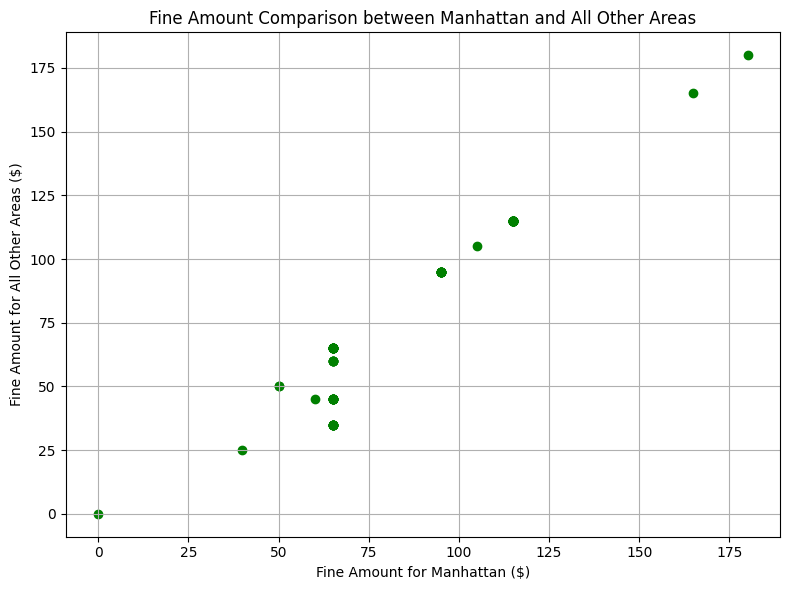

In [10]:

violation_codes = df['Violation_code'].tolist()
fine_manhattan = df['Manhattan_96th_st_and_below'].tolist()
fine_other_areas = df['All_other_areas'].tolist()

# Create a scatter plot to compare fines between manhattan and all other areas
plt.figure(figsize=(8, 6))
plt.scatter(fine_manhattan, fine_other_areas, color='green')
plt.xlabel('Fine Amount for Manhattan ($)')
plt.ylabel('Fine Amount for All Other Areas ($)')
plt.title('Fine Amount Comparison between Manhattan and All Other Areas')
plt.grid(True)
plt.tight_layout()
plt.show()

